In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df=pd.read_csv("dd.csv")
df1=df[df.ItemId==972142]
df1.head()

,ItemId,WeekNoinTotal,YearID,MonthID,MonthNoinTotal,WeekID,WeekNoinMonth,QTY,SALESAVE,on_promo,Display_EndCap,on_display,Page_Number
590,972142,1,2014,Jan,1,W001,1,4,0.0,0,0,0,0
591,972142,2,2014,Jan,1,W002,2,35,0.0,0,0,0,0
592,972142,3,2014,Jan,1,W003,3,46,0.0,0,0,0,0
593,972142,4,2014,Jan,1,W004,4,39,0.0,0,0,0,0
594,972142,5,2014,Feb,2,W005,1,31,0.0,0,0,0,0


In [3]:
df2=df1[['WeekNoinTotal','QTY']]
df2=df2.set_index('WeekNoinTotal')

In [4]:
df3=df1[['WeekNoinTotal','QTY', 'on_promo','on_display']]
df3=df3.set_index('WeekNoinTotal')
df3.head()

,QTY,on_promo,on_display
WeekNoinTotal,,,
1,4,0,0
2,35,0,0
3,46,0,0
4,39,0,0
5,31,0,0


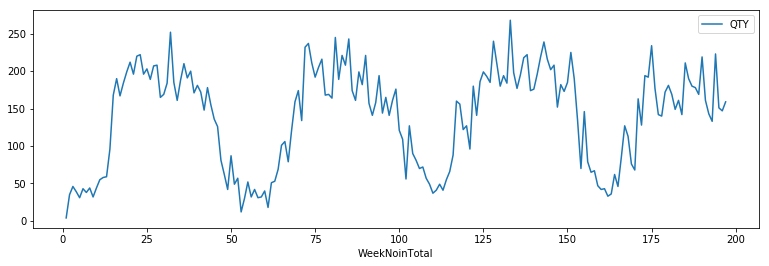

In [5]:
df3.plot(y='QTY', use_index=True, figsize=(13,4))

In [6]:
rolmean=df2.rolling(window=4).mean()
rolmean.head(6)

,QTY
WeekNoinTotal,
1,NaN
2,NaN
3,NaN
4,31.00
5,37.75
6,39.75


In [7]:
rolmean.drop([1,2,3],axis=0, inplace=True)
df2.drop([1,2,3], axis=0, inplace=True)
df3.drop([1,2,3], axis=0, inplace=True)

In [8]:
df3['RolMean']=rolmean['QTY']
df3.head()

,QTY,on_promo,on_display,RolMean
WeekNoinTotal,,,,
4,39,0,0,31.00
5,31,0,0,37.75
6,43,0,0,39.75
7,38,0,0,37.75
8,44,0,0,39.00


In [9]:
x1=df3[['on_promo']]
y1=df3[['QTY']]

result1 = smf.ols(formula= 'QTY ~ on_promo', data= df3).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QTY   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     136.2
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           3.93e-24
Time:                        18:08:48   Log-Likelihood:                -1031.5
No. Observations:                 194   AIC:                             2067.
Df Residuals:                     192   BIC:                             2074.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.6078      6.941     10.317      0.000      57.918      85.298
on_promo      94.3502      8.084     11.671      0.000      78.405     110.296
==============================================================================
Omnibus:                        2.229   Durbin-Watson:                   0.515
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.275
Skew:                          -0.253   Prob(JB):                        0.321
Kurtosis:                       2.839   Cond. No.                         3.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


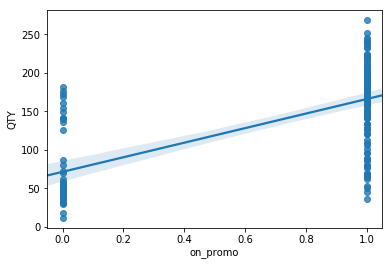

In [10]:
sns.regplot(x='on_promo', y='QTY', data=df3)

In [11]:
pred1 = result1.predict(x1)
rms1 = sqrt(mean_squared_error(y1, pred1))
rms1

49.311439520667825

In [12]:
x2=df3[['on_promo', 'on_display']]
y2=df3[['QTY']]

result2 = smf.ols(formula= 'QTY ~ on_promo + on_display', data= df3).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QTY   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     77.61
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           2.14e-25
Time:                        18:08:56   Log-Likelihood:                -1025.8
No. Observations:                 194   AIC:                             2058.
Df Residuals:                     191   BIC:                             2067.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.6078      6.758     10.596      0.000      58.278      84.937
on_promo      87.2860      8.141     10.721      0.000      71.228     103.344
on_display    33.6729      9.912      3.397      0.001      14.122      53.224
==============================================================================
Omnibus:                        0.625   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.756
Skew:                          -0.082   Prob(JB):                        0.685
Kurtosis:                       2.742   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred2 = result2.predict(x2)
rms2= sqrt(mean_squared_error(y2, pred2))
rms2

47.88593885652411

In [14]:
x3=df3[['on_promo', 'on_display', 'RolMean']]
y3=df3[['QTY']]

result3 = smf.ols(formula= 'QTY ~ on_promo + on_display + RolMean', data= df3).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QTY   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     388.2
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           9.38e-81
Time:                        18:09:02   Log-Likelihood:                -893.00
No. Observations:                 194   AIC:                             1794.
Df Residuals:                     190   BIC:                             1807.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3434      4.559      0.075      0.940      -8.650       9.337
on_promo      25.3474      4.881      5.193      0.000      15.719      34.976
on_display    -3.6609      5.255     -0.697      0.487     -14.026       6.705
RolMean        0.8749      0.037     23.606      0.000       0.802       0.948
==============================================================================
Omnibus:                        2.842   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.660
Skew:                           0.287   Prob(JB):                        0.265
Kurtosis:                       3.021   Cond. No.                         487.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
pred3 = result3.predict(x3)
rms3 = sqrt(mean_squared_error(y3, pred3))
rms3

24.146417014521035

In [40]:
x4=df3[['RolMean']]
y4=df3[['QTY']]

result4 = smf.ols(formula= 'QTY ~ RolMean', data= df3).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QTY   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1005.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           3.03e-78
Time:                        15:24:09   Log-Likelihood:                -905.97
No. Observations:                 194   AIC:                             1816.
Df Residuals:                     192   BIC:                             1822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7471      4.688      1.013      0.313      -4.500      13.994
RolMean        0.9727      0.031     31.709      0.000       0.912       1.033
==============================================================================
Omnibus:                        6.035   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.728
Skew:                           0.360   Prob(JB):                       0.0570
Kurtosis:                       3.435   Cond. No.                         385.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pred4 = result4.predict(x4)
rms4 = sqrt(mean_squared_error(y4, pred4))
rms4

25.816258304649708

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


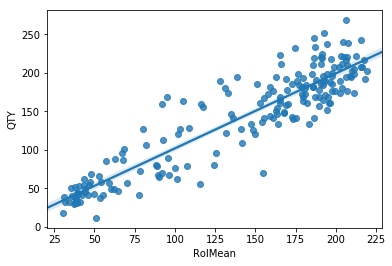

In [42]:
sns.regplot(x='RolMean', y='QTY', data=df3)

In [43]:
df3.corr()

,QTY,on_promo,on_display,RolMean
QTY,1.000000,0.644205,0.341062,0.916329
on_promo,0.644205,1.000000,0.255421,0.577991
on_display,0.341062,0.255421,1.000000,0.385084
RolMean,0.916329,0.577991,0.385084,1.000000


In [44]:
x5=df3[['on_display', 'RolMean']]
y5=df3[['QTY']]

result5 = smf.ols(formula= 'QTY ~ on_display + RolMean', data= df3).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QTY   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     500.7
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.10e-76
Time:                        15:24:10   Log-Likelihood:                -905.87
No. Observations:                 194   AIC:                             1818.
Df Residuals:                     191   BIC:                             1828.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3349      4.790      0.905      0.367      -5.113      13.782
on_display    -2.4708      5.595     -0.442      0.659     -13.507       8.566
RolMean        0.9783      0.033     29.372      0.000       0.913       1.044
==============================================================================
Omnibus:                        5.986   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.696
Skew:                           0.354   Prob(JB):                       0.0579
Kurtosis:                       3.451   Cond. No.                         476.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
pred5 = result5.predict(x5)

In [46]:
rms5 = sqrt(mean_squared_error(y5, pred5))
rms5

25.80309065734583

In [47]:
x6=df3[['on_promo']]
y6=df3[['RolMean']]

result6 = smf.ols(formula= 'RolMean ~ on_promo', data= df3).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RolMean   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     96.32
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.10e-18
Time:                        15:24:10   Log-Likelihood:                -1032.5
No. Observations:                 194   AIC:                             2069.
Df Residuals:                     192   BIC:                             2076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4559      6.976     11.676      0.000      67.696      95.216
on_promo      79.7487      8.126      9.814      0.000      63.721      95.776
==============================================================================
Omnibus:                        6.624   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.778
Skew:                          -0.433   Prob(JB):                       0.0337
Kurtosis:                       2.705   Cond. No.                         3.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
pred6 = result6.predict(x6)

In [49]:
rms6 = sqrt(mean_squared_error(y6, pred6))
rms6

49.56406183591052